In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize
sns.set_theme(style="darkgrid")
figsize(10, 6)
pd.set_option('display.max_colwidth', -1)


/var/folders/0t/rs4xlk9945xdd3cxy6yc9j340000gq/T/ipykernel_37521/3913289642.py:9: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [56]:
def get_indexes(raw):
   if( not pd.isna(raw)):
      highlights = re.findall(r'\d+:', raw)
      return list(map(lambda x: int(x.replace(':', '')) - 1, highlights))

In [105]:
data = pd.read_csv('survey_responses.csv')
data = data.drop(['StartDate', 'ResponseId', 'EndDate', 'IPAddress', 'Progress', 'Duration (in seconds)', 'RecipientLastName', 'RecipientFirstName', 'RecipientEmail', 'ExternalReference', 'LocationLatitude', 'LocationLongitude', 'DistributionChannel', 'Q_RecaptchaScore', 'UserLanguage'], axis=1)[data['Finished'] == 'True']
data['highlight_hp_high_1'] = data['highlight_hp_high_1'].map(get_indexes)
data['highlight_hp_high_2'] = data['highlight_hp_high_2'].map(get_indexes)
data['highlight_hp_low_1'] = data['highlight_hp_low_1'].map(get_indexes)
data['highlight_hp_low_2'] = data['highlight_hp_low_2'].map(get_indexes)
data['highlight_hero_high_1'] = data['highlight_hero_high_1'].map(get_indexes)
data['highlight_hero_high_2'] = data['highlight_hero_high_2'].map(get_indexes)
data['highlight_hero_low_1'] = data['highlight_hero_low_1'].map(get_indexes)
data['highlight_hero_low_2'] = data['highlight_hero_low_2'].map(get_indexes)
data.head()

,Status,Finished,RecordedDate,genre,hours_read,read_harry_potter,read_hero_academia,aphantasia_check,highlight_hp_high_1,highlight_hp_high_2,...,highlight_hero_low_2,rate_hero_low_1,rate_hero_low_2,rate_hero_low_3,rate_hero_low_4,rate_hero_low_5,Q61,Q62,Q63,Random ID
1,Survey Preview,True,2022-04-09 18:05:25,sci-fi,2-4 hours,Yes,No,3,"[2, 3, 10, 21, 33, 34]",[28],...,[10],Slightly agree,Slightly agree,Neutral,Slightly disagree,Slightly disagree,somewhat,yes,NaN,2718156370
2,IP Address,True,2022-04-11 14:12:22,Sci-fi short stories,0-1 hours,Yes,No,5,"[1, 13, 21, 23, 33]","[28, 34]",...,"[2, 7, 13]",Slightly disagree,Strongly disagree,Strongly agree,Strongly disagree,Strongly disagree,No,yes,Allow for sub-sentence highlighitng,1170260771
3,IP Address,True,2022-04-15 15:50:12,sci fi,2-4 hours,Yes,No,5,"[0, 11, 21, 26, 33, 34]","[2, 5, 6, 7, 17, 18, 30]",...,"[1, 2, 7, 8, 15]",Slightly disagree,Slightly disagree,Strongly agree,Strongly disagree,Slightly disagree,"It had a slight effect, but not a lot",Yes,NaN,5450760650


In [112]:
hp_high_sentences = list(open('hp_high.txt', 'r').read().split('\n'))
hp_low_sentences = list(open('hp_low.txt', 'r').read().split('\n'))
hero_high_sentences = list(open('hero_high.txt', 'r').read().split('\n'))
hero_low_sentences = list(open('hero_low.txt', 'r').read().split('\n'))


In [113]:
hp_high_sentences

["He'd been dreaming of it since the defeat of Voldemort.",
 'The Veil, that is.',
 'The one that Sirius had fallen behind.',
 "The last time he'd dreamed about the Department of Mysteries, Sirius had died.",
 'The world had also finally woken up to the truth about Voldemort, but the price had been too high for him to be grateful.',
 'And once the truth was out, the attacks had gotten worse.',
 'He wondered, briefly, why he was there.',
 'Ginny was at home, she was pregnant, she needed him.',
 'Yet he could not seem to stay away.',
 'Voldemort was gone, true.',
 'But then, so were so many other people, good people, who should not have died.',
 'He counted the steps until he was standing right in front of where Sirius had fallen through.',
 'Cedric. Sirius. Dumbledore. Hedwig. Moody. Dobby. Tonks father. Remus. Colin Creevy. Tonks. Snape. Fred.',
 "Hell, even Crabbe didn't deserve to die then.",
 'There were more, many more, but none of them close to him.',
 'They were close to somebody

In [107]:
def group_highlights(sent, highlights):
   highlight_array = np.zeros(len(sent) + 1)
   for x in highlights:
      if(x != None):
         highlight_array[x] += 1
   return highlight_array

In [110]:
def get_highlight_text(sent, bool_array):
   return [sent[i] for i in np.where(bool_array)[0]]

In [108]:
def show_highlight_results(storyName, incOrDec, sentences):
   column = f"highlight_{storyName}_{incOrDec}"
   sent_count = len(sentences)
   x = np.linspace(0, sent_count, sent_count + 1)
   y = group_highlights(sentences, data[column])
   plt.scatter(x, y)
   plt.xlabel("Sentences")
   plt.ylabel("Highlight Count")
   plt.title(f"{'Positive' if(incOrDec == 1) else 'Negative'} Highlights for {storyName}")

   plt.show()
   return ( get_highlight_text(sentences, y), y)

[2, 3, 10, 21, 33, 34]
[1, 13, 21, 23, 33]
[0, 11, 21, 26, 33, 34]


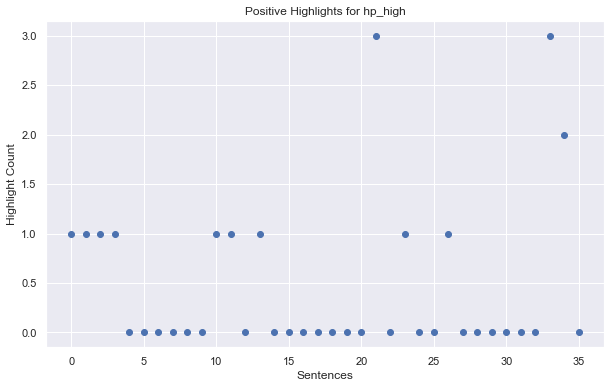

35 36
["He'd been dreaming of it since the defeat of Voldemort.", 'The Veil, that is.', 'The one that Sirius had fallen behind.', "The last time he'd dreamed about the Department of Mysteries, Sirius had died.", 'But then, so were so many other people, good people, who should not have died.', 'He counted the steps until he was standing right in front of where Sirius had fallen through.', "Hell, even Crabbe didn't deserve to die then.", 'He was lying on a floor, covered by a poor excuse for a blanket, and someone appeared to be attempting to break the door down.', 'Dudley? Where had the Veil sent him?', 'There was a crash behind them and Uncle Vernon came skidding into the room, holding a rifle.', 'SMASH! The door flew clean off its hinges and landed on the floor with a thunderous crash.', 'Hagrid stood in the doorway, looking very impressive.']


In [115]:
sentences, counts = show_highlight_results('hp_high', 1, hp_high_sentences)
print(sentences)

In [4]:
questions = pd.read_csv('survey_responses.csv')[0:1]

In [5]:
scale_questions = ['emotional_affect', 'forgetting_surroundings', 'distracted', 'characters_alive', 'mental_imagery']